# Pre-Processing Data

In [61]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [62]:
# Loading dataset
df = pd.read_csv('data.csv')
df = df.drop_duplicates()
df.head(10)

,company,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,prev_rank,CEO,Website,Ticker,Market Cap
0,Walmart,1,0.0,572754.0,13673.0,2300000.0,Retailing,Bentonville,AR,no,no,no,yes,1.0,C. Douglas McMillon,https://www.stock.walmart.com,WMT,352037
1,Amazon,2,0.0,469822.0,33364.0,1608000.0,Retailing,Seattle,WA,no,no,no,yes,2.0,Andrew R. Jassy,www.amazon.com,AMZN,1202717
2,Apple,3,0.0,365817.0,94680.0,154000.0,Technology,Cupertino,CA,no,no,no,yes,3.0,Timothy D. Cook,www.apple.com,AAPL,2443962
3,CVS Health,4,0.0,292111.0,7910.0,258000.0,Health Care,Woonsocket,RI,no,no,yes,yes,4.0,Karen Lynch,https://www.cvshealth.com,CVS,125204
4,UnitedHealth Group,5,0.0,287597.0,17285.0,350000.0,Health Care,Minnetonka,MN,no,no,no,yes,5.0,Andrew P. Witty,www.unitedhealthgroup.com,UNH,500468
5,Exxon Mobil,6,4.0,285640.0,23040.0,63000.0,Energy,Irving,TX,no,no,no,yes,10.0,Darren W. Woods,www.exxonmobil.com,XOM,371841
6,Berkshire Hathaway,7,-1.0,276094.0,89795.0,372000.0,Financials,Omaha,NE,no,no,no,yes,6.0,Warren E. Buffett,www.berkshirehathaway.com,BRKA,625468
7,Alphabet,8,1.0,257637.0,76033.0,156500.0,Technology,Mountain View,CA,no,no,no,yes,9.0,Sundar Pichai,https://www.abc.xyz,GOOGL,1309359
8,McKesson,9,-2.0,238228.0,-4539.0,67500.0,Health Care,Irving,TX,no,no,no,no,7.0,Brian S. Tyler,www.mckesson.com,MCK,47377
9,AmerisourceBergen,10,-2.0,213988.8,1539.9,40000.0,Health Care,Conshohocken,PA,no,no,no,yes,8.0,Steven H. Collis,www.amerisourcebergen.com,ABC,29972


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company            1000 non-null   object 
 1   rank               1000 non-null   int64  
 2   rank_change        1000 non-null   float64
 3   revenue            1000 non-null   float64
 4   profit             997 non-null    float64
 5   num. of employees  999 non-null    float64
 6   sector             1000 non-null   object 
 7   city               1000 non-null   object 
 8   state              1000 non-null   object 
 9   newcomer           1000 non-null   object 
 10  ceo_founder        1000 non-null   object 
 11  ceo_woman          1000 non-null   object 
 12  profitable         1000 non-null   object 
 13  prev_rank          1000 non-null   object 
 14  CEO                1000 non-null   object 
 15  Website            1000 non-null   object 
 16  Ticker             951 no

1) Dropping unique columns for each company
2) "prev_rank" as half values are missing
3) "profit" column as it directly affects target column

In [64]:
df = df.drop(['company', 'CEO', 'Website', 'Ticker','prev_rank', 'profit'], axis=1)

Dealing with "rank" values which had duplicates, as we will use this column later

In [65]:
# Sort df by rank
df = df.sort_values(by='rank')

# Resetting index to ensure consecutive index values
#df = df.reset_index(drop=True)

# Iterate over the rows and assign sequential ranks
for i in range(len(df)):
    if df.loc[i, 'rank'] != i + 1:
        df.loc[i, 'rank'] = i + 1

# Display the count of each rank
print(df['rank'].value_counts().sort_index(ascending=False))


rank
1000    1
999     1
998     1
997     1
996     1
       ..
5       1
4       1
3       1
2       1
1       1
Name: count, Length: 1000, dtype: int64


Deleting non numerical values in"Market Cap", "prev_rank" columns

In [66]:
print(df['Market Cap'].replace('-', np.nan).astype(float).isna().sum())
df['Market Cap'] = df['Market Cap'].replace('-', np.nan).astype(float)
df.info()

39
<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               1000 non-null   int64  
 1   rank_change        1000 non-null   float64
 2   revenue            1000 non-null   float64
 3   num. of employees  999 non-null    float64
 4   sector             1000 non-null   object 
 5   city               1000 non-null   object 
 6   state              1000 non-null   object 
 7   newcomer           1000 non-null   object 
 8   ceo_founder        1000 non-null   object 
 9   ceo_woman          1000 non-null   object 
 10  profitable         1000 non-null   object 
 11  Market Cap         961 non-null    float64
dtypes: float64(4), int64(1), object(7)
memory usage: 133.9+ KB


Binary encoder

In [67]:
# Binary encoding of categorical columns

columns_to_map = ['newcomer', 'ceo_founder', 'ceo_woman', 'profitable']
for column in columns_to_map:
    df[column] = df[column].map({'yes': 1, 'no': 0})

Missing values with KNNI

In [68]:
non_numerical_columns = ['sector', 'city', 'state', 'rank_change']
concatting_columns = ['sector', 'city', 'state', 'rank', 'rank_change']
non_numerical_columns_df = df[non_numerical_columns]
concatting_columns_df = df[concatting_columns] 
df_1 = df.copy()
df_1 = df_1.drop(non_numerical_columns, axis=1)


# Missing value imputation with KNNImputer

imputer = KNNImputer(n_neighbors=5)
# Getting the columns with missing values
columns_with_missing_values = df_1.columns[df_1.isna().any()].tolist()

for column in columns_with_missing_values:
    missing_column = df_1[column]
    missing_column_2d = missing_column.values.reshape(-1, 1)
    imputed_column_2d = imputer.fit_transform(missing_column_2d)
    df_1[column] = imputed_column_2d.flatten()



# Assigning in df_1 the non-numerical columns from df by rank
df_1 = pd.merge(df_1, concatting_columns_df, on='rank', how='left')
df_1 = df_1.drop('rank', axis=1)
df = df_1
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   revenue            1000 non-null   float64
 1   num. of employees  1000 non-null   float64
 2   newcomer           1000 non-null   int64  
 3   ceo_founder        1000 non-null   int64  
 4   ceo_woman          1000 non-null   int64  
 5   profitable         1000 non-null   int64  
 6   Market Cap         1000 non-null   float64
 7   sector             1000 non-null   object 
 8   city               1000 non-null   object 
 9   state              1000 non-null   object 
 10  rank_change        1000 non-null   float64
dtypes: float64(4), int64(4), object(3)
memory usage: 86.1+ KB


Understanding a bit better city and state column 

In [69]:
# How many city in each state
k = df['city'].unique()
f = df['state'].unique()
print(f" There are {len(k)} cities")
print(f" There are {len(f)} states")    
city_per_state = df.groupby('state')['city'].nunique().sort_values(ascending=False)
print("Top states by city count:")
city_per_state[:10]

 There are 400 cities
 There are 46 states
Top states by city count:


state
CA    50
PA    26
TX    22
IL    22
MI    22
OH    22
NJ    19
FL    19
MA    16
NY    16
Name: city, dtype: int64

#### Modificating city and state columns, choosing largest 15 state and 50 cities by it's company_count as we cover almost all companies, because of non equal distribuition of companies by states and cities

In [70]:
# Find top 15 states by city count
top_states = df['state'].value_counts().nlargest(15).index

# Mark states that are not in the top 15 as 'state_other'
df['state'] = df['state'].where(df['state'].isin(top_states), 'state_other')

# Find top 50 cities by company count
top_cities = df['city'].value_counts().nlargest(50).index

# Mark cities that are not in the top 50 as 'city_other'
df['city'] = df['city'].where(df['city'].isin(top_cities), 'city_other')

# Now you can perform one-hot encoding on the reduced number of categories
df = pd.get_dummies(df, columns=['state', 'city'], drop_first=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 74 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   revenue             1000 non-null   float64
 1   num. of employees   1000 non-null   float64
 2   newcomer            1000 non-null   int64  
 3   ceo_founder         1000 non-null   int64  
 4   ceo_woman           1000 non-null   int64  
 5   profitable          1000 non-null   int64  
 6   Market Cap          1000 non-null   float64
 7   sector              1000 non-null   object 
 8   rank_change         1000 non-null   float64
 9   state_CT            1000 non-null   bool   
 10  state_FL            1000 non-null   bool   
 11  state_GA            1000 non-null   bool   
 12  state_IL            1000 non-null   bool   
 13  state_MA            1000 non-null   bool   
 14  state_MI            1000 non-null   bool   
 15  state_MN            1000 non-null   bool   
 16  state_N

Chossing top 10 sectors by company_count for the same issue with distribution, but telecomunications sector will balance sector_other, as it has majority profitable companies

In [71]:
# One hot sector by top 10 and others
top_10 = df['sector'].value_counts().index[:10]
df['sector'] = df['sector'].apply(lambda x: x if x in top_10 else 'others')
df = pd.get_dummies(df, columns=['sector'], drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 83 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   revenue                           1000 non-null   float64
 1   num. of employees                 1000 non-null   float64
 2   newcomer                          1000 non-null   int64  
 3   ceo_founder                       1000 non-null   int64  
 4   ceo_woman                         1000 non-null   int64  
 5   profitable                        1000 non-null   int64  
 6   Market Cap                        1000 non-null   float64
 7   rank_change                       1000 non-null   float64
 8   state_CT                          1000 non-null   bool   
 9   state_FL                          1000 non-null   bool   
 10  state_GA                          1000 non-null   bool   
 11  state_IL                          1000 non-null   bool   
 12  state_M

Choosing best number of features

In [72]:
from sklearn.feature_selection import SelectKBest, f_classif

X = df.drop('profitable', axis=1)
y = df['profitable']

# Going trough all features and plotting f1 score for feature numbers
f1_scores = []
for i in range(1, len(X.columns) + 1):
    selector = SelectKBest(f_classif, k=i)
    X_new = selector.fit_transform(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)
    clf = RandomForestClassifier(random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1_scores.append(f1_score(y_test, y_pred))

plt.plot(range(1, len(X.columns) + 1), f1_scores, marker='o')
plt.xlabel('Number of features')
plt.ylabel('F1 score')
plt.show()




In [ ]:
# Select the highest f1 score and use it to select the best features

highest_f1_score = max(f1_scores)
best_number_of_features = f1_scores.index(highest_f1_score) + 1
print("Best number of features:", best_number_of_features)
selector = SelectKBest(f_classif, k=best_number_of_features)
X_new = selector.fit_transform(X, y)

# Get the features that were selected
selected_features = pd.DataFrame(selector.inverse_transform(X_new), index=X.index, columns=X.columns) 
selected_columns = selected_features.columns[selected_features.var() != 0] 
selected_columns  

Best number of features: 66


Index(['revenue', 'num. of employees', 'newcomer', 'ceo_founder', 'ceo_woman',
       'Market Cap', 'rank_change', 'state_FL', 'state_GA', 'state_MA',
       'state_MI', 'state_MN', 'state_NY', 'state_OH', 'state_PA', 'state_TX',
       'state_VA', 'state_state_other', 'city_Atlanta', 'city_Austin',
       'city_Boca Raton', 'city_Boston', 'city_Chicago', 'city_Columbus',
       'city_Dallas', 'city_Deerfield', 'city_Denver', 'city_Detroit',
       'city_Englewood', 'city_Houston', 'city_Indianapolis', 'city_Irving',
       'city_Jacksonville', 'city_Las Vegas', 'city_Los Angeles',
       'city_McLean', 'city_Miami', 'city_Milwaukee', 'city_Nashville',
       'city_New York', 'city_Norwalk', 'city_Oklahoma City', 'city_Orlando',
       'city_Philadelphia', 'city_Phoenix', 'city_Pittsburgh', 'city_Reston',
       'city_Richmond', 'city_San Antonio', 'city_San Diego',
       'city_San Francisco', 'city_San Jose', 'city_Scottsdale',
       'city_St. Louis', 'city_St. Paul', 'city_The Wood

In [ ]:
# Returning X and y to df
df = df[selected_columns]
df['profitable'] = y
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 67 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   revenue                           1000 non-null   float64
 1   num. of employees                 1000 non-null   float64
 2   newcomer                          1000 non-null   int64  
 3   ceo_founder                       1000 non-null   int64  
 4   ceo_woman                         1000 non-null   int64  
 5   Market Cap                        1000 non-null   float64
 6   rank_change                       1000 non-null   float64
 7   state_FL                          1000 non-null   bool   
 8   state_GA                          1000 non-null   bool   
 9   state_MA                          1000 non-null   bool   
 10  state_MI                          1000 non-null   bool   
 11  state_MN                          1000 non-null   bool   
 12  state_N

# Processing data

Splitting in train and test data

In [ ]:
# Shuffle rows of df
df = df.sample(frac=1, random_state=4).reset_index(drop=True)

# Splitting data
y = df['profitable']
X = df.drop('profitable', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Training set - X:", X_train.shape, "y:", y_train.shape)
print("Test set - X:", X_test.shape, "y:", y_test.shape)


Training set - X: (800, 66) y: (800,)
Test set - X: (200, 66) y: (200,)


Removing 3% of outliers from train set 

In [ ]:
# Removing outliers with Isolation Forest
outlier_detector = IsolationForest(contamination=0.03)
outlier_detector.fit(X_train)
no_outliers = outlier_detector.predict(X_train)
no_outliers = no_outliers == 1
X_train, y_train = X_train[no_outliers], y_train[no_outliers]
print("Training set - X:", X_train.shape, "y:", y_train.shape)



Training set - X: (776, 66) y: (776,)


In [ ]:
y_train.value_counts()

profitable
1    685
0     91
Name: count, dtype: int64

Learning Curve Function

In [ ]:
# Learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

 Testing models

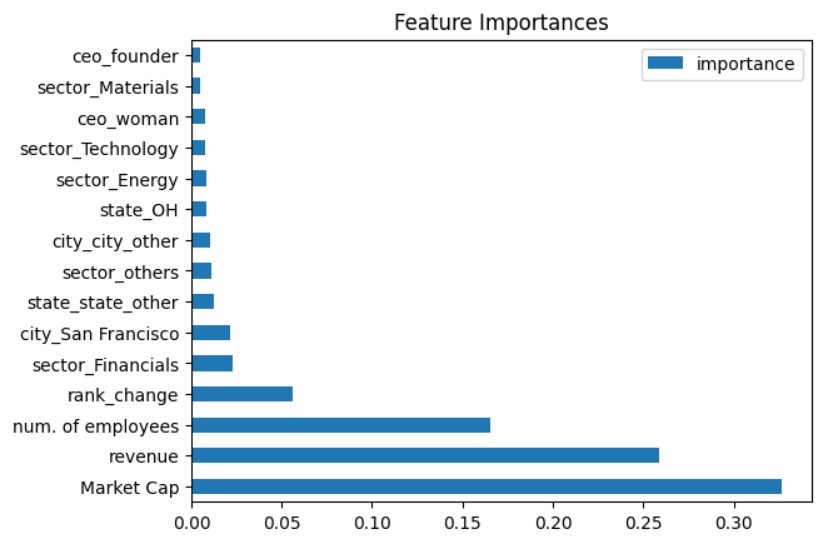

In [ ]:
"""from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.combine import SMOTEENN 
from crucio import SMOTEENN as SMOTEN

# Log transformation function
def log_transform(X):
    return np.log1p(X)  

# Define the parameter grids for each model
param_grids = {
    'RandomForestClassifier': {'classifier__n_estimators': [100, 150, 200], 'classifier__max_depth': [None, 10, 20]},
    'XGBClassifier': {'classifier__n_estimators': [100, 150, 200], 'classifier__learning_rate': [0.01, 0.1], 'classifier__max_depth': [3, 5, 7]},
    'DecisionTreeClassifier': {'classifier__max_depth': [10, 20]},
    'LogisticRegression': {'classifier__C': [0.1, 1, 10]},
    'AdaBoostClassifier': {'classifier__n_estimators': [50, 100]},
    'SVC': {'classifier__C': [0.1, 1, 10], 'classifier__kernel': ['linear', 'rbf']},
    'KNeighborsClassifier': {'classifier__n_neighbors': [3, 5, 7]}
}

# Define the models with their respective class_weights if applicable
models = {
    'RandomForestClassifier': RandomForestClassifier(class_weight={0: 1, 1: 3}),
    'XGBClassifier': XGBClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(class_weight={0: 1, 1: 3}),
    'LogisticRegression': LogisticRegression(class_weight={0: 1, 1: 3}),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'SVC': SVC(class_weight={0: 1, 1: 3}),
    'KNeighborsClassifier': KNeighborsClassifier()
}

# Function to create the pipeline and perform grid search
def create_pipeline_and_grid_search(model_key, X_train, y_train):
    # Define the class balancing techniques
    class_balancers = {
        'SMOTEENN': SMOTEENN(),
        'SMOTEN': SMOTEN()
    }
    
    # Define pipelines for models requiring log transformation and StandardScaler
    if model_key in ['LogisticRegression', 'SVC', 'KNeighborsClassifier']:
        pipe = ImbPipeline([
            ('log_transform', FunctionTransformer(log_transform)),
            ('scaler', StandardScaler()),
            ('sampler', class_balancers['SMOTEENN']),  
            ('classifier', models[model_key])
        ])
    else:  # For models not requiring log transformation and StandardScaler
        pipe = ImbPipeline([
            ('sampler', class_balancers['SMOTEENN']),  
            ('classifier', models[model_key])
        ])
    
    # Create the GridSearchCV object
    grid_search = GridSearchCV(estimator=pipe, param_grid=param_grids[model_key], cv=5, scoring='accuracy')
    
    # Fit the GridSearchCV object to the training data
    grid_search.fit(X_train, y_train)
    
    # Return the fitted GridSearchCV object
    return grid_search

# Example usage for one model
# Replace 'RandomForestClassifier' with any model key from the 'models' dictionary
grid_search = create_pipeline_and_grid_search('RandomForestClassifier', X_train, y_train)

# Retrieve the best estimator
best_model = grid_search.best_estimator_"""

In [ ]:
# Applying smote and edited nearest neighbours as 
"""from imblearn.over_sampling import SMOTEN
from imblearn.under_sampling import EditedNearestNeighbours

smote = SMOTEN()
enn = EditedNearestNeighbours()

X_train, y_train = enn.fit_resample(X_train, y_train)
X_train, y_train = smote.fit_resample(X_train, y_train)"""

from crucio import SMOTEENN

# Reset index of X_train and y_train
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

# Concatenate X_train and y_train
df_smotee = pd.concat([X_train, y_train], axis=1)

smoteenn = SMOTEENN()
df_smotee = smoteenn.balance(df_smotee, 'profitable')

# Splitting X_train and y_train
X_train = df_smotee.drop('profitable', axis=1)
y_train = df_smotee['profitable']


ValueError: Shape of passed values is (0, 1), indices imply (0, 66)

In [ ]:
y_train.value_counts()

profitable
0    485
1    485
Name: count, dtype: int64

Scaling data

Learning curve

In [ ]:
# Random Forest
# Create a RandomForestClassifier
class_weights = {0: 1, 1: 3}
clf_forest = RandomForestClassifier(class_weight=class_weights, random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 150, 200],  
    'max_depth': [None, 25, 50], 
}

# Create a GridSearchCV object
grid_search = GridSearchCV(clf_forest, param_grid, cv=3)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Create a RandomForestClassifier with the best parameters
clf_forest = RandomForestClassifier(class_weight=class_weights, n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'])

# Fit the model
clf_forest.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf_forest.predict(X_test)

# Print the metrics
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

precision = precision_score(y_test, y_pred)
print(f'Precision: {precision}')

recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')

f1 = f1_score(y_test, y_pred)
print(f'F1: {f1}')

roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC: {roc_auc}')

fpr, tpr, thresholds = roc_curve(y_test, y_pred)    
roc_auc = auc(fpr, tpr)
print(f'ROC AUC: {roc_auc}')

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)




# Plot the learning curve
#plot_learning_curve(clf_forest, 'Learning Curve (Random Forest)', X_train, y_train, cv=5)

Accuracy: 0.85
Precision: 0.907103825136612
Recall: 0.9273743016759777
F1: 0.9171270718232045
ROC AUC: 0.5589252460760841
ROC AUC: 0.5589252460760841
[[  4  17]
 [ 13 166]]


                   importance
Market Cap           0.326857
revenue              0.258715
num. of employees    0.165353
rank_change          0.056390
sector_Financials    0.022515
...                       ...
city_Detroit         0.000032
city_Englewood       0.000019
city_Austin          0.000004
city_St. Paul        0.000002
city_Boca Raton      0.000000

[66 rows x 1 columns]


Text(0.5, 1.0, 'Feature Importances')

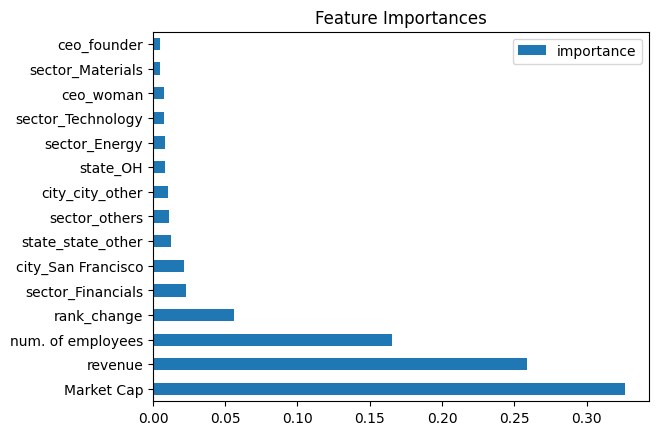

In [ ]:
# Feature importance
from pandas import DataFrame as df
feature_importances = df(clf_forest.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

feture_importances = feature_importances.head(15)

# Plot the feature importances
feture_importances.plot(kind='barh')
plt.title('Feature Importances')

In [171]:
# Xgboost
from xgboost import XGBClassifier

# Create a XGBClassifier

clf_xgb = XGBClassifier( random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 150, 200],  
    'max_depth': [3, 5, 7], 
}

# Create a GridSearchCV object
grid_search = GridSearchCV(clf_xgb, param_grid, cv=3)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Create a XGBClassifier with the best parameters
clf_xgb = XGBClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], random_state=42)

# Fit the model
clf_xgb.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf_xgb.predict(X_test)

# Print the metrics
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

precision = precision_score(y_test, y_pred)
print(f'Precision: {precision}')

recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')

f1 = f1_score(y_test, y_pred)
print(f'F1: {f1}')

roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC: {roc_auc}')

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(f'ROC AUC: {roc_auc}')

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot the learning curve
#plot_learning_curve(clf_xgb, 'Learning Curve (XGBoost)', X_train, y_train, cv=5)


ValueError: 
All the 27 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Simion\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Simion\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py", line 729, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Simion\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py", line 1496, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Simion\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py", line 534, in _wrap_evaluation_matrices
    train_dmatrix = create_dmatrix(
                    ^^^^^^^^^^^^^^^
  File "C:\Users\Simion\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py", line 954, in _create_dmatrix
    return QuantileDMatrix(
           ^^^^^^^^^^^^^^^^
  File "C:\Users\Simion\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py", line 729, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Simion\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py", line 1528, in __init__
    self._init(
  File "C:\Users\Simion\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py", line 1587, in _init
    it.reraise()
  File "C:\Users\Simion\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py", line 575, in reraise
    raise exc  # pylint: disable=raising-bad-type
    ^^^^^^^^^
  File "C:\Users\Simion\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py", line 556, in _handle_exception
    return fn()
           ^^^^
  File "C:\Users\Simion\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py", line 640, in <lambda>
    return self._handle_exception(lambda: self.next(input_data), 0)
                                          ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Simion\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py", line 1280, in next
    input_data(**self.kwargs)
  File "C:\Users\Simion\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py", line 729, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Simion\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py", line 623, in input_data
    new, cat_codes, feature_names, feature_types = _proxy_transform(
                                                   ^^^^^^^^^^^^^^^^^
  File "C:\Users\Simion\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py", line 1315, in _proxy_transform
    arr, feature_names, feature_types = _transform_pandas_df(
                                        ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Simion\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py", line 490, in _transform_pandas_df
    _invalid_dataframe_dtype(data)
  File "C:\Users\Simion\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py", line 308, in _invalid_dataframe_dtype
    raise ValueError(msg)
ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:revenue: object, num. of employees: object, newcomer: object, ceo_founder: object, ceo_woman: object, Market Cap: object, rank_change: object, sector_Energy: object, sector_Financials: object, sector_Health Care: object, sector_Technology: object, sector_others: object, state_FL: object, state_GA: object, state_IL: object, state_MA: object, state_MI: object, state_MN: object, state_NY: object, state_OH: object, state_PA: object, state_TX: object, state_VA: object, state_state_other: object, city_Boston: object, city_Charlotte: object, city_Chicago: object, city_Columbus: object, city_Detroit: object, city_Houston: object, city_Jacksonville: object, city_New York: object, city_Parsippany: object, city_Pittsburgh: object, city_Richmond: object, city_San Jose: object, city_city_other: object


In [172]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Create a GaussianNB
clf_nb = GaussianNB()

# Fit the model
clf_nb.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf_nb.predict(X_test)

# Print the metrics
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

precision = precision_score(y_test, y_pred)
print(f'Precision: {precision}')

recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')

f1 = f1_score(y_test, y_pred)
print(f'F1: {f1}')

roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC: {roc_auc}')

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(f'ROC AUC: {roc_auc}')

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot the learning curve
#plot_learning_curve(clf_nb, 'Learning Curve (Naive Bayes)', X_train, y_train, cv=5)


Accuracy: 0.295
Precision: 0.9523809523809523
Recall: 0.22346368715083798
F1: 0.3619909502262443
ROC AUC: 0.5641127959563714
ROC AUC: 0.5641127959563714
[[ 19   2]
 [139  40]]


In [173]:
#Scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Accuracy: 0.705
Precision: 0.9347826086956522
Recall: 0.7206703910614525
F1: 0.8138801261829653
ROC AUC: 0.6460494812450119
ROC AUC: 0.6460494812450119
[[ 12   9]
 [ 50 129]]


<module 'matplotlib.pyplot' from 'C:\\Users\\Simion\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\matplotlib\\pyplot.py'>

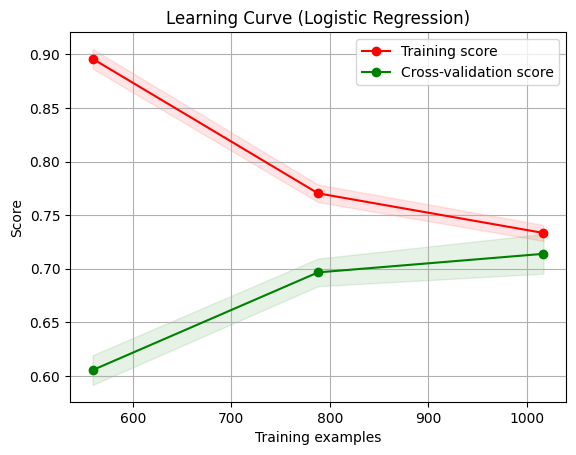

In [182]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_auc_score
# Assigning class weights
class_weights = {0: 1, 1: 1}

# Logistic Regression
logistic_model = LogisticRegression(class_weight=class_weights)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision}')
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')
f1 = f1_score(y_test, y_pred)
print(f'F1: {f1}')
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC: {roc_auc}')
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(f'ROC AUC: {roc_auc}')

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

plot_learning_curve(logistic_model, 'Learning Curve (Logistic Regression)', X_train, y_train, cv=5)

Accuracy: 0.825
Precision: 0.9186046511627907
Recall: 0.88268156424581
F1: 0.9002849002849003
ROC AUC: 0.6080074487895717
ROC AUC: 0.6080074487895717
[[  7  14]
 [ 21 158]]


<module 'matplotlib.pyplot' from 'C:\\Users\\Simion\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\matplotlib\\pyplot.py'>

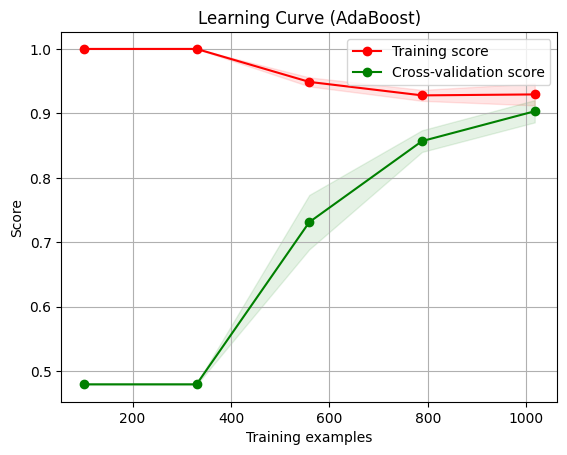

In [184]:
# AdaBoost

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
class_weights = {0: 3, 1: 1}
# Create a DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(max_depth=1, class_weight=class_weights, random_state=42)

# Create an AdaBoostClassifier
clf_adaboost = AdaBoostClassifier(estimator=clf_tree, random_state=42)

# Fit the AdaBoostClassifier
clf_adaboost.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf_adaboost.predict(X_test)

# Print the metrics
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

precision = precision_score(y_test, y_pred)
print(f'Precision: {precision}')

recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')

f1 = f1_score(y_test, y_pred)
print(f'F1: {f1}')

roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC: {roc_auc}')

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

print(f'ROC AUC: {roc_auc}')

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot the learning curve
plot_learning_curve(clf_adaboost, 'Learning Curve (AdaBoost)', X_train, y_train, cv=5)


Accuracy: 0.77
Precision: 0.9079754601226994
Recall: 0.8268156424581006
F1: 0.8654970760233919
ROC AUC: 0.5562649640861932
ROC AUC: 0.5562649640861932
[[  6  15]
 [ 31 148]]


<module 'matplotlib.pyplot' from 'C:\\Users\\Simion\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\matplotlib\\pyplot.py'>

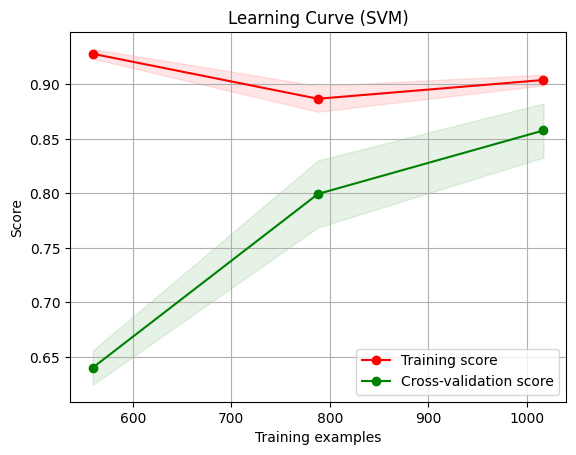

In [188]:
# SVM classifier
from sklearn.svm import SVC
class_weights = {0: 3, 1: 2}
# Create a SVM classifier
clf_svm = SVC(class_weight=class_weights, random_state=42)

# Fit the model
clf_svm.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf_svm.predict(X_test)

# Print the metrics
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

precision = precision_score(y_test, y_pred)
print(f'Precision: {precision}')

recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')

f1 = f1_score(y_test, y_pred)
print(f'F1: {f1}')

roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC: {roc_auc}')

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

print(f'ROC AUC: {roc_auc}')

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)

# Plot the learning curve
plot_learning_curve(clf_svm, 'Learning Curve (SVM)', X_train, y_train, cv=5)


Accuracy: 0.77
Precision: 0.9079754601226994
Recall: 0.8268156424581006
F1: 0.8654970760233919
ROC AUC: 0.5562649640861932
[[  6  15]
 [ 31 148]]


<module 'matplotlib.pyplot' from 'C:\\Users\\Simion\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\matplotlib\\pyplot.py'>

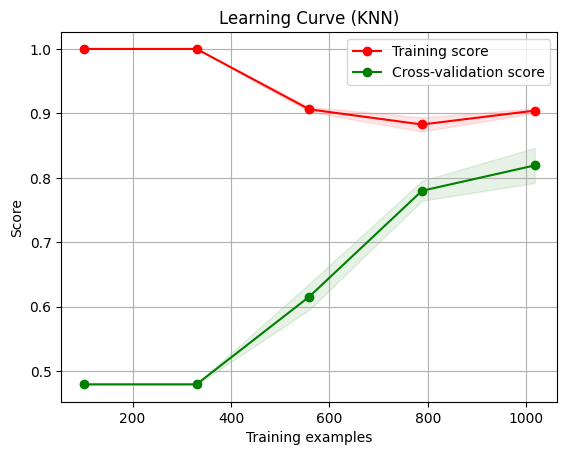

In [190]:
# KNN classifier
from sklearn.neighbors import KNeighborsClassifier
class_weights = {0: 3, 1: 2}

# Create a KNN classifier
clf_knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model
clf_knn.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf_knn.predict(X_test)

# Print the metrics
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

precision = precision_score(y_test, y_pred)
print(f'Precision: {precision}')

recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')

f1 = f1_score(y_test, y_pred)
print(f'F1: {f1}')

roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC: {roc_auc}')


# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot the learning curve
plot_learning_curve(clf_knn, 'Learning Curve (KNN)', X_train, y_train, cv=5)